## Response Spectra

### Import Necessary Packages and Functions

In [1]:
import numpy as np
from numpy import sqrt
import matplotlib
from matplotlib import pyplot as plt

In [2]:
## Load ground motion record
record = np.loadtxt('elcentro.txt')
record = np.array(record)*32.174049*12 #time history was given in g - so convert to in/s^2

### Iterate Response to Generate Response Spectra

In [3]:
for j in range(6): #damping ratio - use decimal not percentage
    Dj=[]
    Vj=[]
    Aj=[]
    TNj=[]
    xi=j*0.02
    for k in range (200,500000,100):
        m=50
        wn = sqrt(k/m)
        Tn=2*np.pi/wn
        c = xi*2*sqrt(m*k) # determine damping coef. from damping ratio
        wd = wn*sqrt(1.0-xi**2.0)
        ##Newmark Beta Variables - Based on Linear Acceleration Method
        gamma = 1/2
        beta = 1/6
        T1=10 #duration of motion evaluation
        dt=0.002 #time step
        N=int(T1/dt) #total number of time points
        t=np.arange(0.0,T1,dt) #generate time vector
        f = np.zeros(N)
        Df = np.zeros(N)

        ## Initial Conditions
        f0=0 # magnitude of force
        u0=0 #initial displacement
        v0=0 # initial velocity
        a0=0
        ui=u0
        dudti=v0
        dudt2i=a0
        u = [u0]
        dudt = [v0]
        dudt2 = [a0]

        ## Newmark-Beta Method (Forced)
        Kbar = k + m/(beta*(dt**2)) + c*gamma/(beta*dt)

        for i in range (1,N):
            if i < (len(record)-1):
                Dfi = -m * (record[i,1]-record[i-1,1])
            else:
                Dfi = 0
            DFbar = Dfi + ((m/(2*beta)) + c*dt*(1-gamma/(2*beta)))*dudt2i + ((1/(beta*dt))*m+(gamma/beta)*c)*dudti
            Dui = DFbar/Kbar
            Ddudt2i = (1/(beta*dt*dt))*Dui - (1/(beta*dt))*dudti - (1/(2*beta))*dudt2i
            Ddudti = dudt2i*dt+gamma*Ddudt2i*dt  
            ui = Dui + ui
            dudti = Ddudti + dudti
            dudt2i = Ddudt2i + dudt2i
            u.append(ui)
            dudt.append(dudti)
            dudt2.append(dudt2i)

        maxdisp=np.max(u)
        Dj.append(maxdisp)
        Vj.append(maxdisp*2*np.pi/Tn)
        Aj.append((maxdisp*((2*np.pi/Tn)**2)/32.174049/12))
        TNj.append(Tn)
    if j == 0 :
        D=Dj
        V=Vj
        A=Aj
        TN=TNj
    else:
        D = np.vstack([D, Dj])
        V = np.vstack([V, Vj])
        A = np.vstack([A, Aj])

KeyboardInterrupt: 

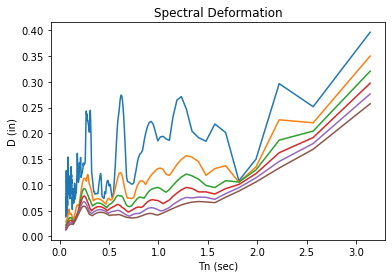

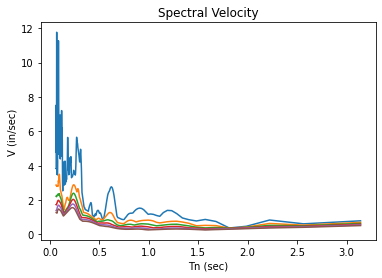

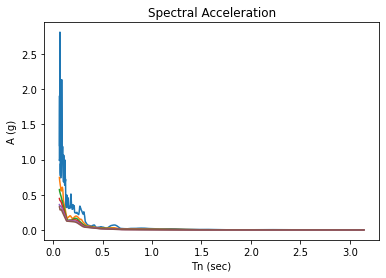

In [4]:
# plt.scatter(TN,D)
plt.plot(TN, D[0], label = "0% Damping")
plt.plot(TN, D[1], label = "2% Damping")
plt.plot(TN, D[2], label = "4% Damping")
plt.plot(TN, D[3], label = "6% Damping")
plt.plot(TN, D[4], label = "8% Damping")
plt.plot(TN, D[5], label = "10% Damping")
plt.title("Spectral Deformation")
plt.xlabel("Tn (sec)")
plt.ylabel("D (in)")
plt.show()
plt.close()

# plt.scatter(TN,V)
plt.plot(TN, V[0], label = "0% Damping")
plt.plot(TN, V[1], label = "2% Damping")
plt.plot(TN, V[2], label = "4% Damping")
plt.plot(TN, V[3], label = "6% Damping")
plt.plot(TN, V[4], label = "8% Damping")
plt.plot(TN, V[5], label = "10% Damping")
plt.title("Spectral Velocity")
plt.xlabel("Tn (sec)")
plt.ylabel("V (in/sec)")
plt.show()

# plt.scatter(TN,A)
plt.plot(TN, A[0], label = "0% Damping")
plt.plot(TN, A[1], label = "2% Damping")
plt.plot(TN, A[2], label = "4% Damping")
plt.plot(TN, A[3], label = "6% Damping")
plt.plot(TN, A[4], label = "8% Damping")
plt.plot(TN, A[5], label = "10% Damping")
plt.title("Spectral Acceleration")
plt.xlabel("Tn (sec)")
plt.ylabel("A (g)")
plt.show()